<a href="https://colab.research.google.com/github/shinobu9/Seminars-in-econometrics/blob/main/sem_8_05_04_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Шаг 1.
!pip install pmdarima
!pip install arch
#Шаг 2. Для тех, кто в Colab
#Runtime - Restart runtime


In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import pmdarima as pm

from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews
from arch.unitroot import ZivotAndrews

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# для генерации фиксированного белого шума
# мы зафиксировали такой белый шум, среднее которого очень близко к нулю и автокорреляции отсутствуют!
np.random.seed(12345)
wn = np.random.standard_normal(201)

nsimulations = 200
empty_dataset = np.zeros(nsimulations)
np.random.seed(12345)

measurement_shocks = np.zeros(nsimulations)

In [ ]:
# тест Дики-Фуллера 
# немного отличается от стандартного вывода adfuller()
def adf_test(timeseries, regression, maxlag = None):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag=maxlag, regression = regression, autolag='AIC',
                      store=False, regresults=False)
    results = adfuller(timeseries, maxlag=maxlag, regression = regression, autolag='AIC', 
                       store=True, regresults=True)[3].resols
    
    results.model.exog_names[0] = 'y(-1)'
    for item in range(dftest[2]):
        results.model.exog_names[item+1] = 'dy(' + str(-item-1) + ')'
    
    trend_len = len(regression) - 1
    if trend_len > 0:
        for item in range(trend_len):
            results.model.exog_names[dftest[2]+item+2] = 'trend' + str(item+1)
        
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    return results

In [ ]:
# тест Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
def kpss_test(timeseries, regression):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression=regression)
        
    kpssoutput = pd.Series(
        kpsstest[0:3],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
        ],
    )
    for key, value in kpsstest[3].items():
        kpssoutput["Critical Value (%s)" % key] = value
    print(kpssoutput)

In [ ]:
# тест Zivot-Andrews:
def za_test(timeseries, regression, maxlag):
    print("Results of Z-A Test:")
    test = zivot_andrews(timeseries, regression=regression, maxlag = maxlag)
        
    output = pd.Series(
        test[0:2],
        index=[
            "Test Statistic",
            "p-value",
        ],
    )
    for key, value in test[2].items():
        output["Critical Value (%s)" % key] = value
        
    output["Breakpoint"] = timeseries.index[test[4]]
    print(output)

## Задача 25

Рассмотрите графики рядов ST_4 и WALK_3, введенных в лекции 7. Проверьте для каждого из этих рядов гипотезу о наличии единичного корня. Значения указанных рядов представлены в файле ex4_1_4.

In [ ]:
data = pd.read_csv('ex4_1_4.csv')
data.head()

,t,st_4,walk_3
0,1,0.000000,0.000000
1,2,1.029601,1.009601
2,3,1.999659,2.085579
3,4,1.763356,2.049208
4,5,1.712927,2.031451


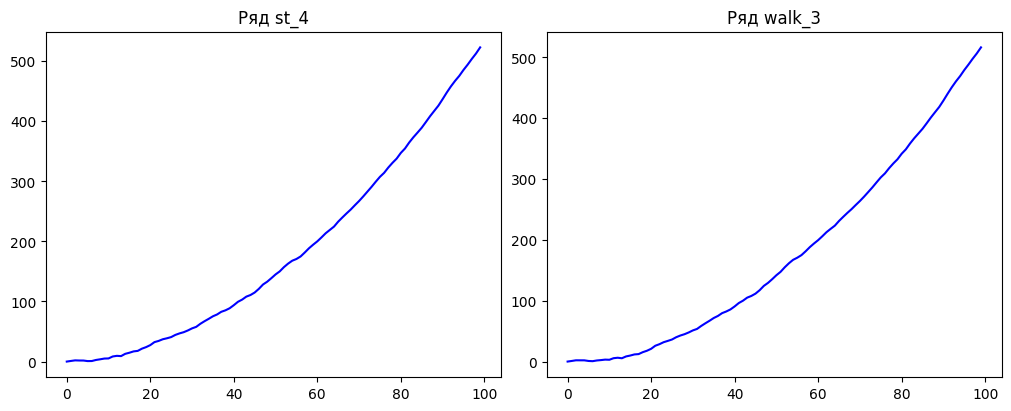

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), constrained_layout=True)

ax1.set(title='Ряд st_4')
ax1.plot(data['st_4'],'b-')

ax2.set(title='Ряд walk_3')
ax2.plot(data['walk_3'],'b-')

plt.show()

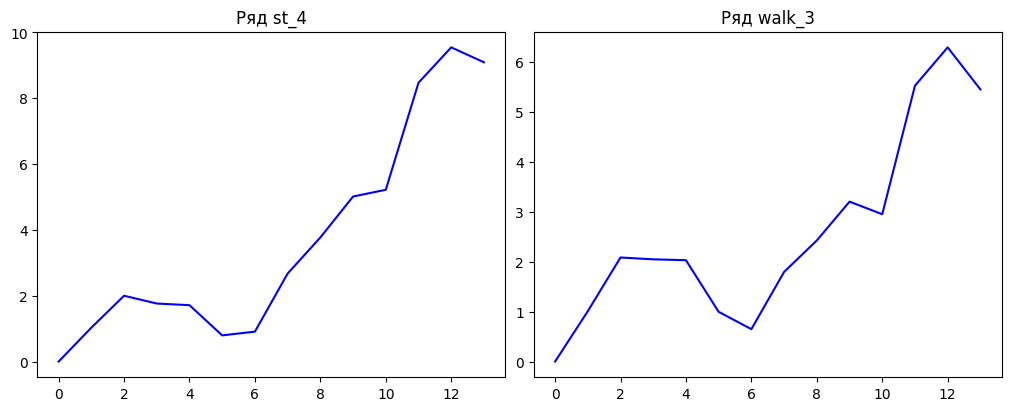

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), constrained_layout=True)

ax1.set(title='Ряд st_4')
ax1.plot(data['st_4'][0:14],'b-')

ax2.set(title='Ряд walk_3')
ax2.plot(data['walk_3'][0:14],'b-')

plt.show()

Проведите тест Дики-Фуллера для ряда st_4

In [ ]:
adf_res = adf_test(data['st_4'], 'ctt')
print(adf_res.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -3.770108
p-value                         0.058887
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -4.493461
Critical Value (5%)            -3.894078
Critical Value (10%)           -3.591222
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.98e-45
Time:                        12:15:13   Log-Likelihood:                -134.30
No. Observations:                  98   AIC:                             278.6
Df Residuals:                      93   BIC:                             291.5
Df Model:                          

Выпишите полученное уравнeние в уровнях:

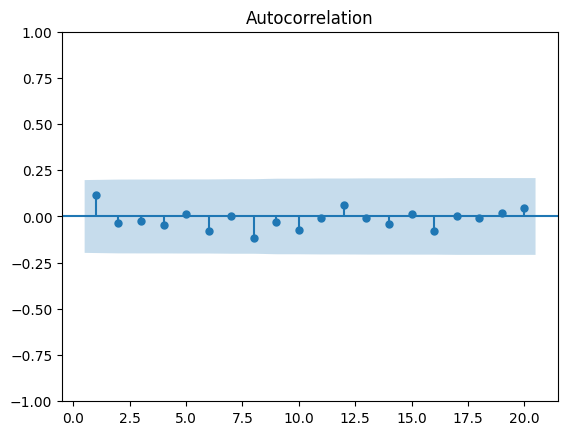

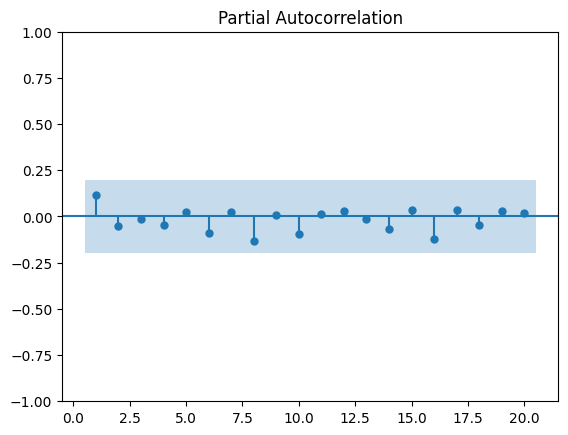

In [ ]:
sm.graphics.tsa.plot_acf(adf_res.resid, zero = False)
sm.graphics.tsa.plot_pacf(adf_res.resid, method = 'ywm', zero = False)
plt.show()

Проведите тест Дики-Фуллера для ряда walk_3

In [ ]:
adf_res = adf_test(data['walk_3'], 'ctt')
print(adf_res.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -3.197843
p-value                         0.209996
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -4.493461
Critical Value (5%)            -3.894078
Critical Value (10%)           -3.591222
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.07e-47
Time:                        12:20:38   Log-Likelihood:                -129.85
No. Observations:                  98   AIC:                             269.7
Df Residuals:                      93   BIC:                             282.6
Df Model:                          

Выпишете полученную модель в уровнях:

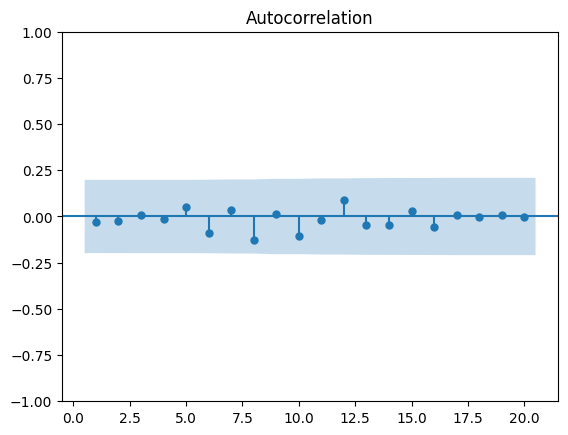

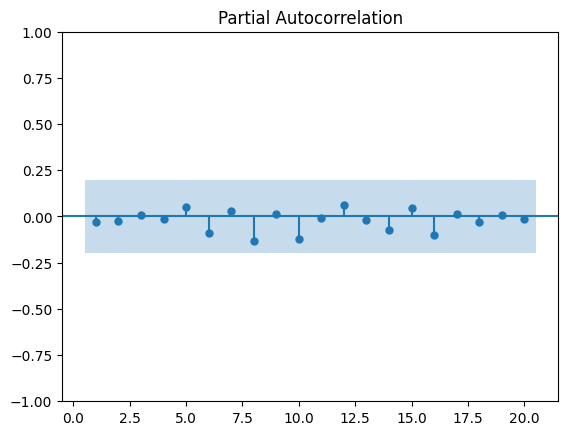

In [ ]:
sm.graphics.tsa.plot_acf(adf_res.resid, zero = False)
sm.graphics.tsa.plot_pacf(adf_res.resid, method = 'ywm', zero = False)
plt.show()

### Задача 26    Применение расширенного критерия Дики – Фуллера для ряда наблюдений – объем продукции фирмы General Motors.

Ранее мы уже подбирали подходящую модель для ряда данных о количестве произведенных всеми отделениями фирмы General Motors Corp транспортных средств (грузовиков, легковых машин и автобусов) за период с 1970 по 1990 г.г., исходя из предположения о стационарности этого ряда. Проверьте гипотезу единичного корня для этого ряда, используя подходящий вариант критерия Дики – Фуллера.

In [ ]:
data = pd.read_csv('general_motors.csv')
data['obs'] = pd.to_datetime(data['obs'], format = '%Y')
data = data.set_index('obs')
data.head()

,X
obs,
1970-01-01,5.3
1971-01-01,7.8
1972-01-01,7.8
1973-01-01,8.7
1974-01-01,6.7


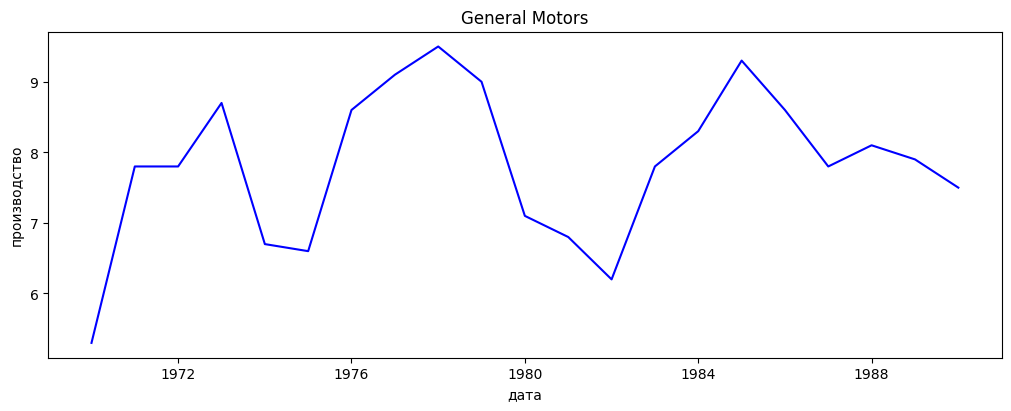

In [ ]:
date_range = (data.index < '1991')
ts = data[date_range]

fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='General Motors')
ax.plot(ts['X'] ,'b-')

ax.xaxis_date()
ax.set_xlabel('дата')
ax.set_ylabel('производство')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()

In [ ]:
adf_res = adf_test(ts['X'], 'c')
print(adf_res.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -2.765085
p-value                         0.063437
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3.051
Date:                Wed, 05 Apr 2023   Prob (F-statistic):              0.271
Time:                        11:07:58   Log-Likelihood:                0.70169
No. Observations:                  12   AIC:                             18.60
Df Residuals:                       2   BIC:                             23.45
Df Model:                          

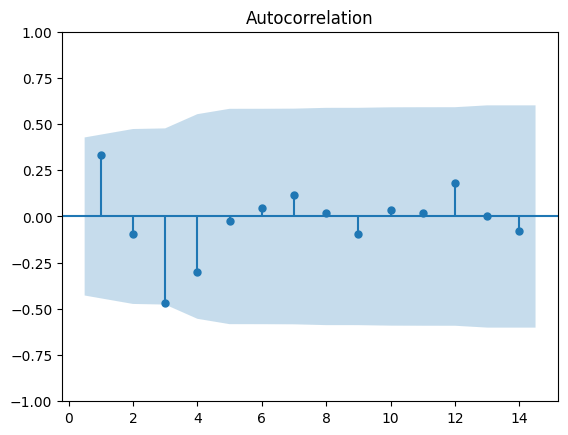

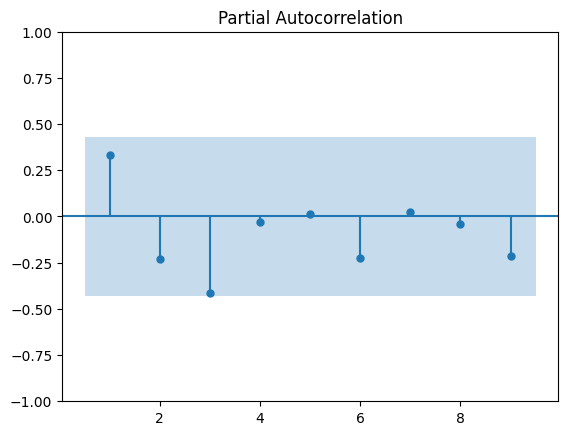

In [ ]:
sm.graphics.tsa.plot_acf(ts['X'], zero = False)
sm.graphics.tsa.plot_pacf(ts['X'], method = 'ywm', zero = False, lags = 9)
plt.show()

Проведите тест Дики-Фуллера

In [ ]:
adf_res = adf_test(ts['X'], 'c', maxlag = 2)
print(adf_res.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -3.972621
p-value                         0.001561
#Lags Used                      2.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     5.320
Date:                Wed, 05 Apr 2023   Prob (F-statistic):             0.0117
Time:                        11:35:41   Log-Likelihood:                -19.068
No. Observations:                  18   AIC:                             46.14
Df Residuals:                      14   BIC:                             49.70
Df Model:                          

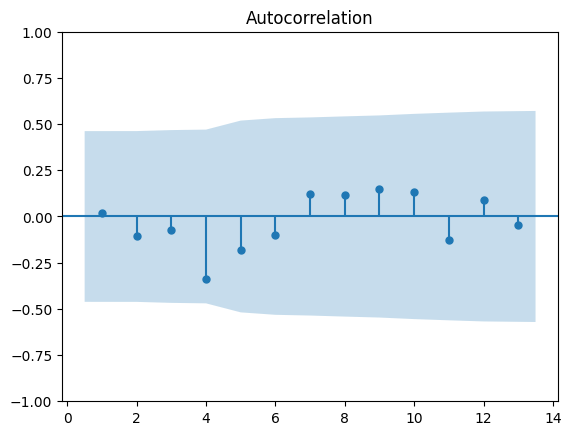

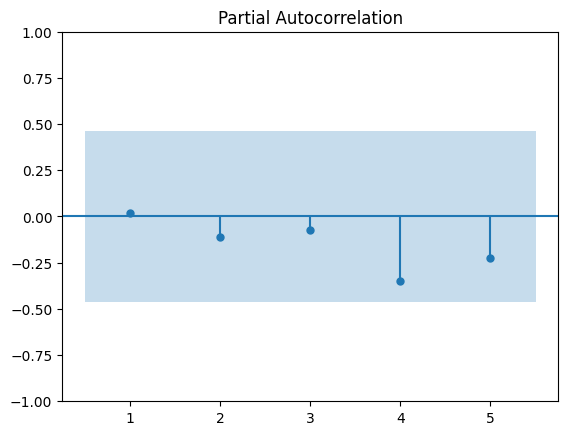

In [ ]:
sm.graphics.tsa.plot_acf(adf_res.resid, zero = False)
sm.graphics.tsa.plot_pacf(adf_res.resid, method = 'ywm', zero = False, lags = 5)
plt.show()

Выпишите полученную модель:

In [ ]:
# гипотеза о стационарности
kpss_test(ts['X'], regression='c')

Results of KPSS Test:
Test Statistic           0.127072
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


### Задача 27   Критерий Перрона

В файле ex4_2_8_perron_data.csv приведен ряд значений реального валового внутреннего продукта США за период с 1959 г. по 2006 г. Рассмотрите график этого ряда.

In [ ]:
data = pd.read_csv('ex4_2_8_perron_data.csv')
data.head()

,date,t,dts,du,rgdp
0,1959,1,0,0,2441.3
1,1960,2,0,0,2501.8
2,1961,3,0,0,2560.0
3,1962,4,0,0,2715.2
4,1963,5,0,0,2834.0


In [ ]:
data['date'] = pd.to_datetime(data['date'], format = '%Y')
data = data.set_index('date')
data.head()

,t,dts,du,rgdp
date,,,,
1959-01-01,1,0,0,2441.3
1960-01-01,2,0,0,2501.8
1961-01-01,3,0,0,2560.0
1962-01-01,4,0,0,2715.2
1963-01-01,5,0,0,2834.0


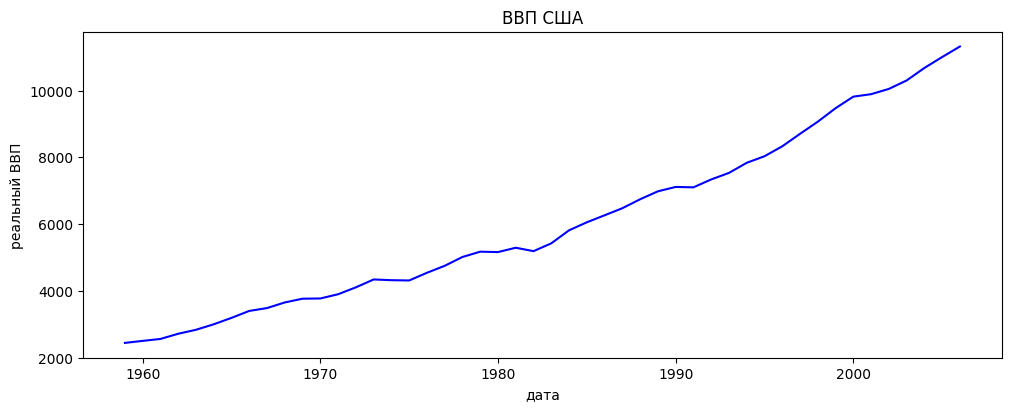

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='ВВП США')
ax.plot(data['rgdp'] ,'b-')

ax.xaxis_date()
ax.set_xlabel('дата')
ax.set_ylabel('реальный ВВП')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()

Сравните наклон линии тренда на периоде 1959 – 1982 г.г. и на периоде 1983 – 2006 г.г. оценивая на этих периодах линейную регрессию RGDP на константу и время.

In [ ]:
date_range = (data.index < '1983')
ts_1 = data[date_range]
ts_2 = data[~date_range]

In [ ]:
mod_1 = sm.tsa.statespace.SARIMAX(ts_1['rgdp'], trend='ct', order=(0,0,0))
res_1 = mod_1.fit(cov_type = 'robust', disp = False)
print(res_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   rgdp   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                -142.159
Date:                Wed, 05 Apr 2023   AIC                            290.317
Time:                        11:27:09   BIC                            293.851
Sample:                    01-01-1959   HQIC                           291.255
                         - 01-01-1982                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2362.1093     28.343     83.340      0.000    2306.558    2417.661
drift        132.5772      3.033     43.705      0.000     126.632     138.523
sigma2      8172.4359   2388.602      3.421      0.0

In [ ]:
mod_2 = sm.tsa.statespace.SARIMAX(ts_2['rgdp'], trend='ct', order=(0,0,0))
res_2 = mod_2.fit(cov_type = 'robust', disp = False)
print(res_2.summary())

                               SARIMAX Results                                
Dep. Variable:                   rgdp   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                -159.595
Date:                Wed, 05 Apr 2023   AIC                            325.189
Time:                        11:27:17   BIC                            328.724
Sample:                    01-01-1983   HQIC                           326.127
                         - 01-01-2006                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5328.4932     76.073     70.045      0.000    5179.394    5477.593
drift        250.7049      5.060     49.543      0.000     240.787     260.623
sigma2      3.495e+04   5638.551      6.198      0.0

Считая структурный сдвиг инновационным, проверьте гипотезу единичного корня в рамках модели сегментированного тренда. По результатам проверки этой гипотезы постройте аппроксимирующую модель, описывающую динамику ряда.

In [ ]:
# столбец приращений ВВП
data['drgdp'] = data['rgdp'].diff(1)

# столбец лагов приращений ВВП
data['drgdp(-1)'] = data['drgdp'].shift(1)

# столбец лагов ВВП
data['rgdp(-1)'] = data['rgdp'].shift(1)

In [ ]:
mod_perron = sm.regression.linear_model.OLS(data['drgdp'][1:],
                                            exog = sm.add_constant(data[['t', 'dts', 'rgdp(-1)', ]])[1:])
res_perron = mod_perron.fit()
print(res_perron.summary())

                            OLS Regression Results                            
Dep. Variable:                  drgdp   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9.037
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           9.32e-05
Time:                        11:34:22   Log-Likelihood:                -279.88
No. Observations:                  47   AIC:                             567.8
Df Residuals:                      43   BIC:                             575.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        585.4681    189.081      3.096      0.0

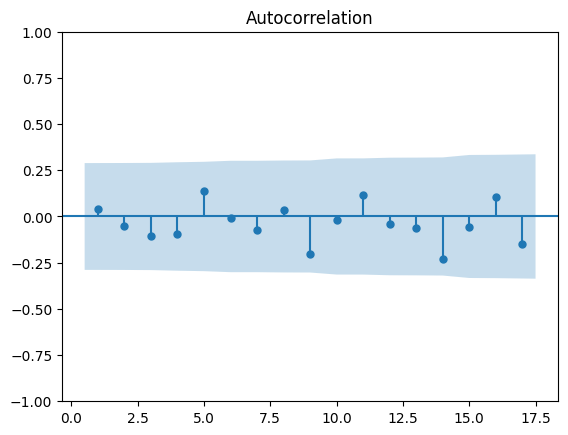

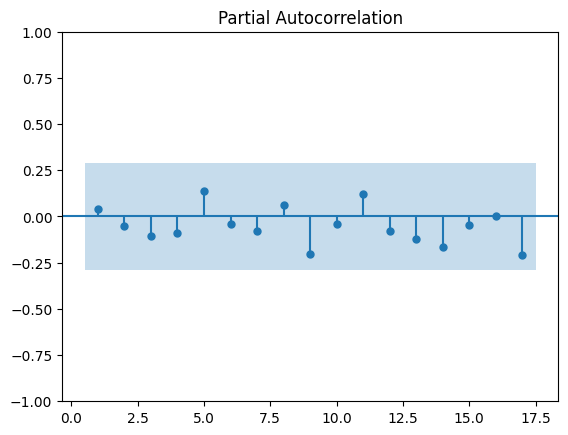

In [ ]:
sm.graphics.tsa.plot_acf(res_perron.resid, zero = False)
sm.graphics.tsa.plot_pacf(res_perron.resid, method = 'ywm', zero = False)
plt.show()

In [ ]:
mod_perron = sm.regression.linear_model.OLS(data['drgdp'][2:],
                                            exog = sm.add_constant(data[['t', 'dts', 'rgdp(-1)', 'drgdp(-1)']])[2:])
res_perron = mod_perron.fit()
print(res_perron.summary())

                            OLS Regression Results                            
Dep. Variable:                  drgdp   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     8.405
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           4.77e-05
Time:                        11:37:08   Log-Likelihood:                -271.31
No. Observations:                  46   AIC:                             552.6
Df Residuals:                      41   BIC:                             561.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        655.3214    183.553      3.570      0.0

Отвергается ли гипотеза единичного корня?

Какую модель следует оценить?

In [ ]:
mod_perron_2 = sm.regression.linear_model.OLS(data['drgdp'][1:],
                                            exog = sm.add_constant(data[['du']])[1:])
res_perron_2 = mod_perron_2.fit()
print(res_perron_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  drgdp   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     21.69
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.85e-05
Time:                        11:43:32   Log-Likelihood:                -282.13
No. Observations:                  47   AIC:                             568.3
Df Residuals:                      45   BIC:                             572.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.4783     20.858      5.728      0.0

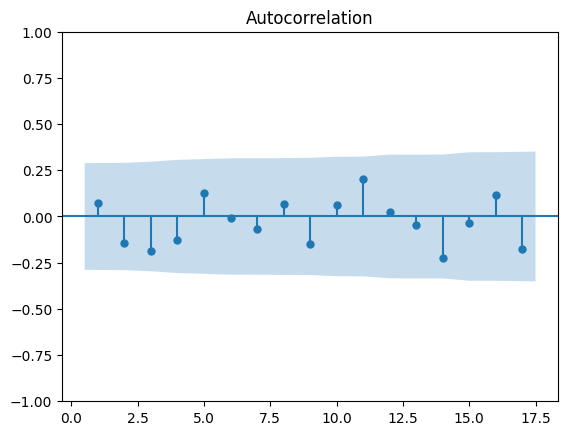

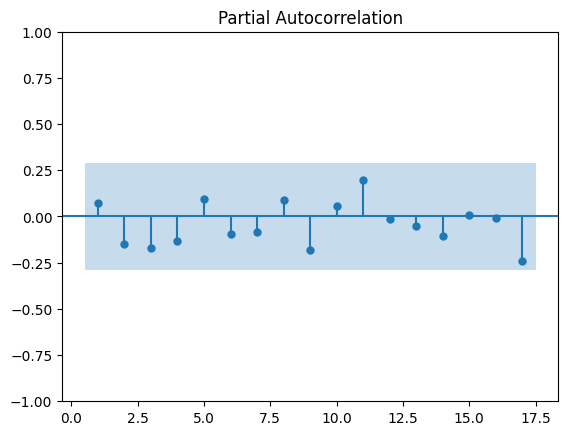

In [ ]:
sm.graphics.tsa.plot_acf(res_perron_2.resid, zero = False)
sm.graphics.tsa.plot_pacf(res_perron_2.resid, method = 'ywm', zero = False)
plt.show()

Выпишите получившуюся модель в уровнях:

Совпали ли результаты с оценками трендов на отдельных периодах?

## Задача 28 Применение критерия Дики – Фуллера к ряду наблюдений c выраженной сезонностью – объемы добычи угля в РФ в период 2001 – 2006 гг. (месячные данные).

В файле ex4_1_2_new_coal приведены данные об объемах добычи угля в РФ (X) в период 2001 – 2006 гг. (месячные данные). Проверьте гипотезу единичного корня для этого ряда, используя подходящий вариант критерия Дики –Фуллера.  

In [ ]:
data = pd.read_csv('ex4_1_2_new_coal.csv')
data.head()

,DATE,COAL
0,01.01.2001,54.5
1,01.02.2001,49.1
2,01.03.2001,53.2
3,01.04.2001,48.0
4,01.05.2001,47.2


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], format = '%d' + '.' + '%m' + '.' + '%Y')
data = data.set_index('DATE')
data.head()

,COAL
DATE,
2001-01-01,54.5
2001-02-01,49.1
2001-03-01,53.2
2001-04-01,48.0
2001-05-01,47.2


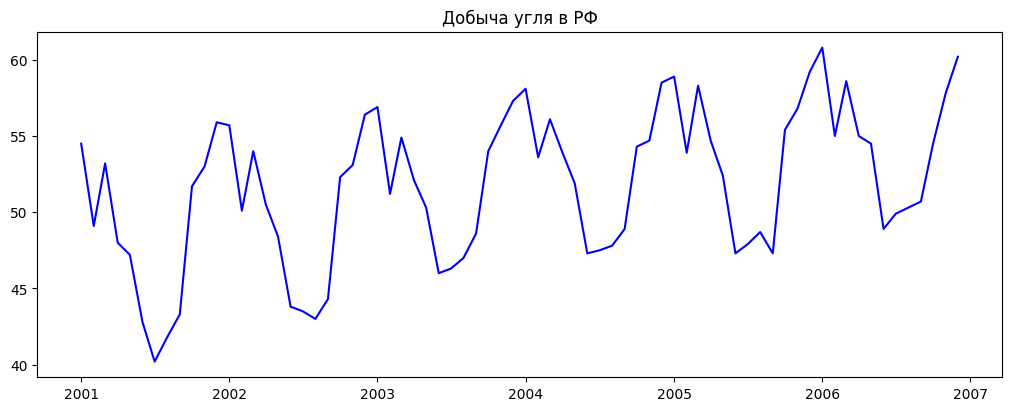

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='Добыча угля в РФ')
ax.plot(data['COAL'],'b-')

plt.show()

Сначала примените критерий Дики-Фуллера к исходному ряду. СПЕЦИФИКАЦИЯ С КОНСТАНТОЙ И ТРЕНДОМ

In [ ]:
print(adf_test(data['COAL'], 'ct').summary())

Results of Dickey-Fuller Test:
Test Statistic                 -1.096247
p-value                         0.929692
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -4.121032
Critical Value (5%)            -3.487720
Critical Value (10%)           -3.172110
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     39.54
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.89e-20
Time:                        11:54:40   Log-Likelihood:                -78.385
No. Observations:                  59   AIC:                             186.8
Df Residuals:                      44   BIC:                             217.9
Df Model:                          

Отвергается ли гипотеза единичного корня?

#### 1 способ: очистить сезонность дамми

In [ ]:
dum = pd.get_dummies(data.index.month)
dum.index = data.index
dum

,1,2,3,4,5,6,7,8,9,10,11,12
DATE,,,,,,,,,,,,
2001-01-01,1,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,0,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2006-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2006-10-01,0,0,0,0,0,0,0,0,0,1,0,0


очистка от сезонности

$y_{t-1}$

In [ ]:
mod_d = sm.tsa.statespace.SARIMAX(data['COAL'], trend='n', order=(0,0,0), exog = dum)
results_d = mod_d.fit(disp = False)
print(results_d.summary())

                               SARIMAX Results                                
Dep. Variable:                   COAL   No. Observations:                   72
Model:                        SARIMAX   Log Likelihood                -161.985
Date:                Wed, 05 Apr 2023   AIC                            349.970
Time:                        11:56:12   BIC                            379.566
Sample:                    01-01-2001   HQIC                           361.752
                         - 12-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1             57.4833      1.038     55.403      0.000      55.450      59.517
2             52.1500      1.001     52.075      0.000      50.187      54.113
3             55.8500      1.055     52.929      0.0

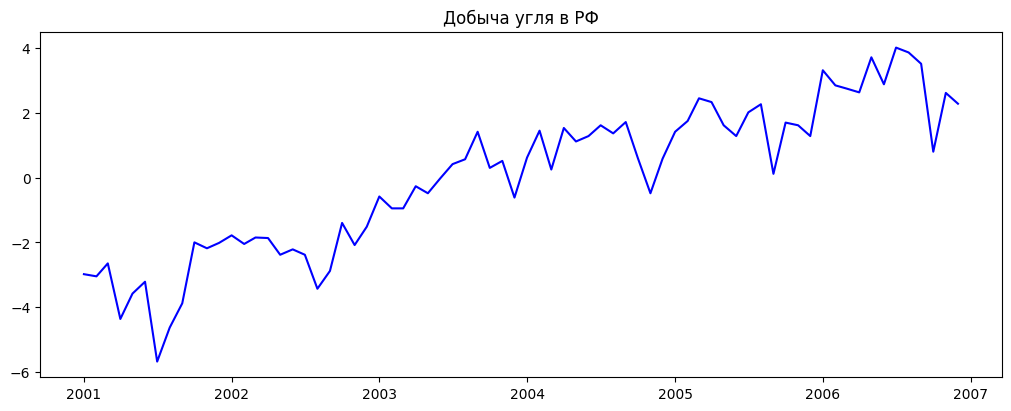

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='Добыча угля в РФ')
ax.plot(results_d.resid,'b-')

plt.show()

Запустим тест на очищенных данных:

In [ ]:
res_adf_d = adf_test(results_d.resid, 'ct')
print(res_adf_d.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -4.965602
p-value                         0.000238
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value (1%)            -4.092293
Critical Value (5%)            -3.474246
Critical Value (10%)           -3.164308
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     12.34
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.67e-05
Time:                        11:57:41   Log-Likelihood:                -85.257
No. Observations:                  71   AIC:                             176.5
Df Residuals:                      68   BIC:                             183.3
Df Model:                          

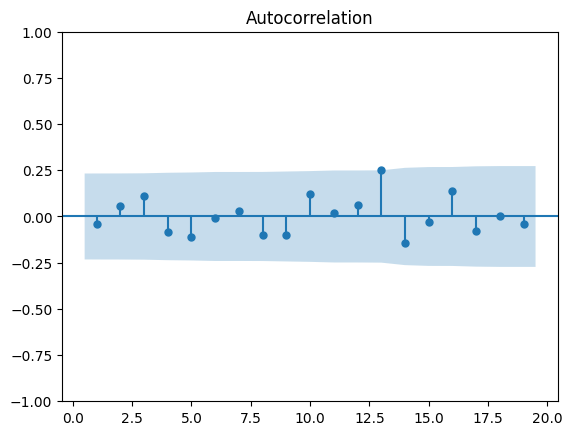

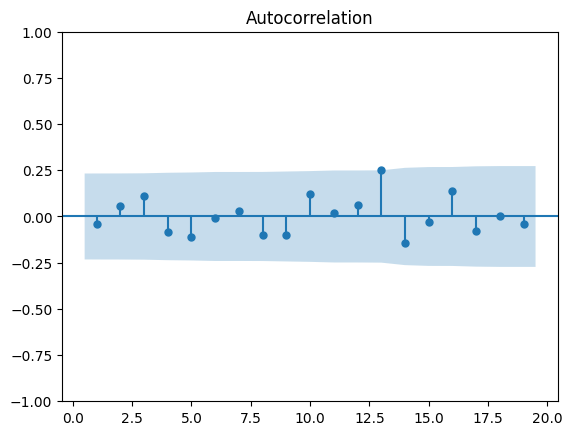

In [ ]:
sm.graphics.tsa.plot_acf(res_adf_d.resid, zero = False)

#### 2 способ: очистить сезонность пакетом

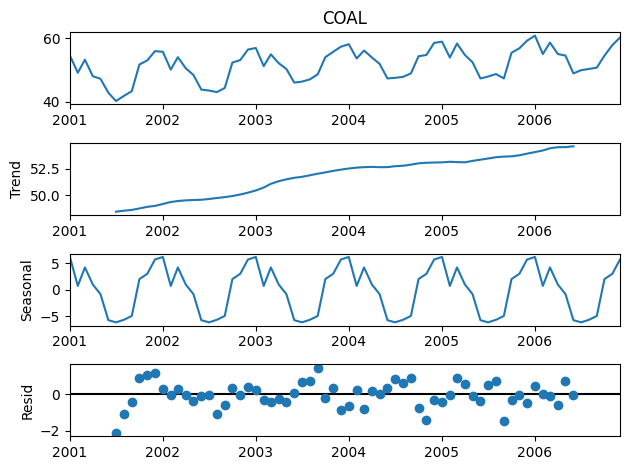

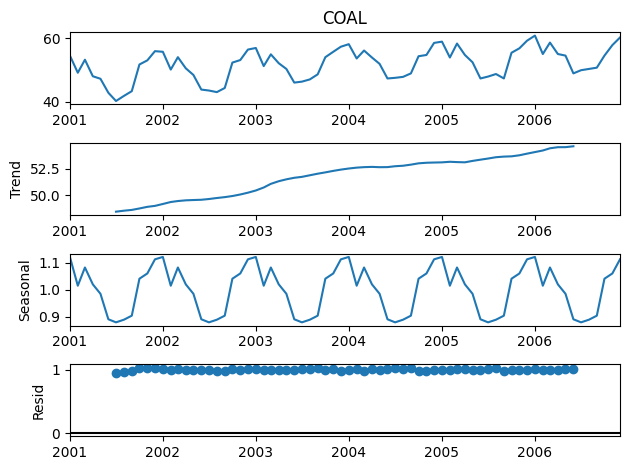

In [ ]:
sm.tsa.seasonal_decompose(data['COAL'], model='additive').plot()
sm.tsa.seasonal_decompose(data['COAL'], model='multiplicative').plot()
plt.show()

In [ ]:
data['COAL_SA'] = data['COAL'] - sm.tsa.seasonal_decompose(data['COAL'], model='additive').seasonal

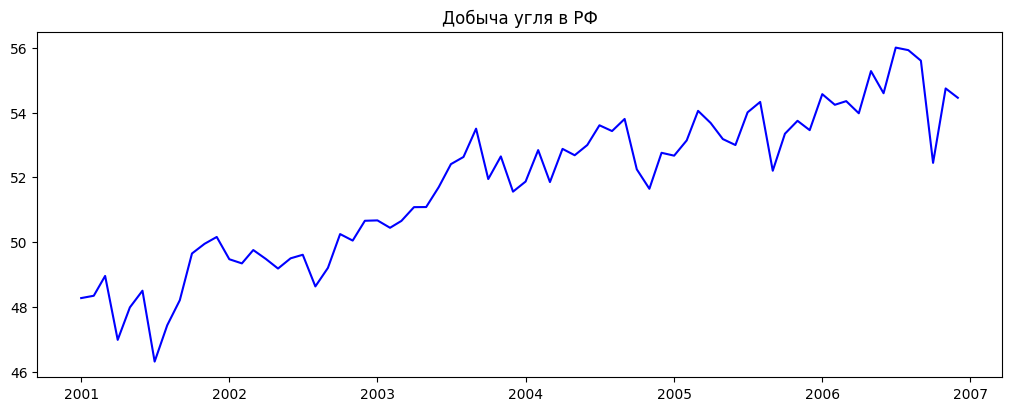

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='Добыча угля в РФ')
ax.plot(data['COAL_SA'],'b-')

plt.show()

Запустим тест на очищенных данных:

In [ ]:
res_adf = adf_test(data['COAL_SA'], 'ct')
print(res_adf.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -5.336699
p-value                         0.000048
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value (1%)            -4.092293
Critical Value (5%)            -3.474246
Critical Value (10%)           -3.164308
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     14.26
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           6.73e-06
Time:                        12:01:34   Log-Likelihood:                -83.053
No. Observations:                  71   AIC:                             172.1
Df Residuals:                      68   BIC:                             178.9
Df Model:                          

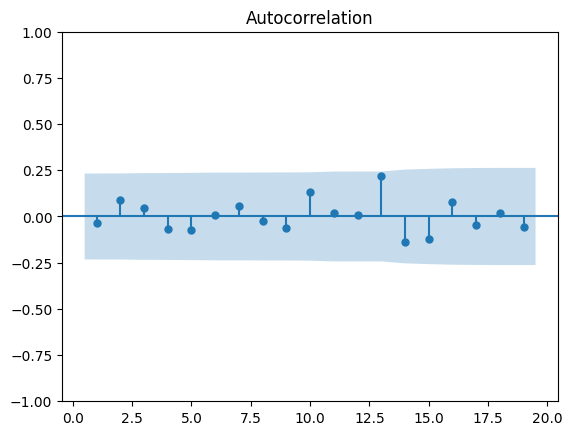

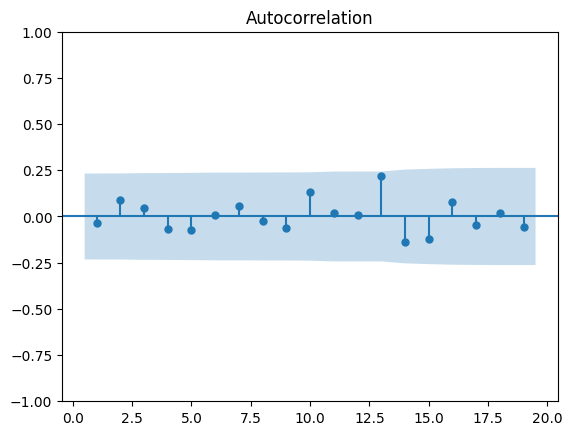

In [ ]:
sm.graphics.tsa.plot_acf(res_adf.resid, zero = False)

Отвергается ли гипотеза единичного корня? Подберите подходящу сезонную модель к изначальному ряду

Попробуем подобрать SARIMAX модель:

In [ ]:
mod_m = sm.tsa.statespace.SARIMAX(data['COAL'], trend='ct', order=(1,0,0), seasonal_order=(1,0,0,12))
results = mod_m.fit(disp = False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               COAL   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -121.103
Date:                            Wed, 05 Apr 2023   AIC                            252.206
Time:                                    12:03:17   BIC                            263.590
Sample:                                01-01-2001   HQIC                           256.738
                                     - 12-01-2006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4641      0.646      2.266      0.023       0.197       2.731
drift          0.0141      0.005   

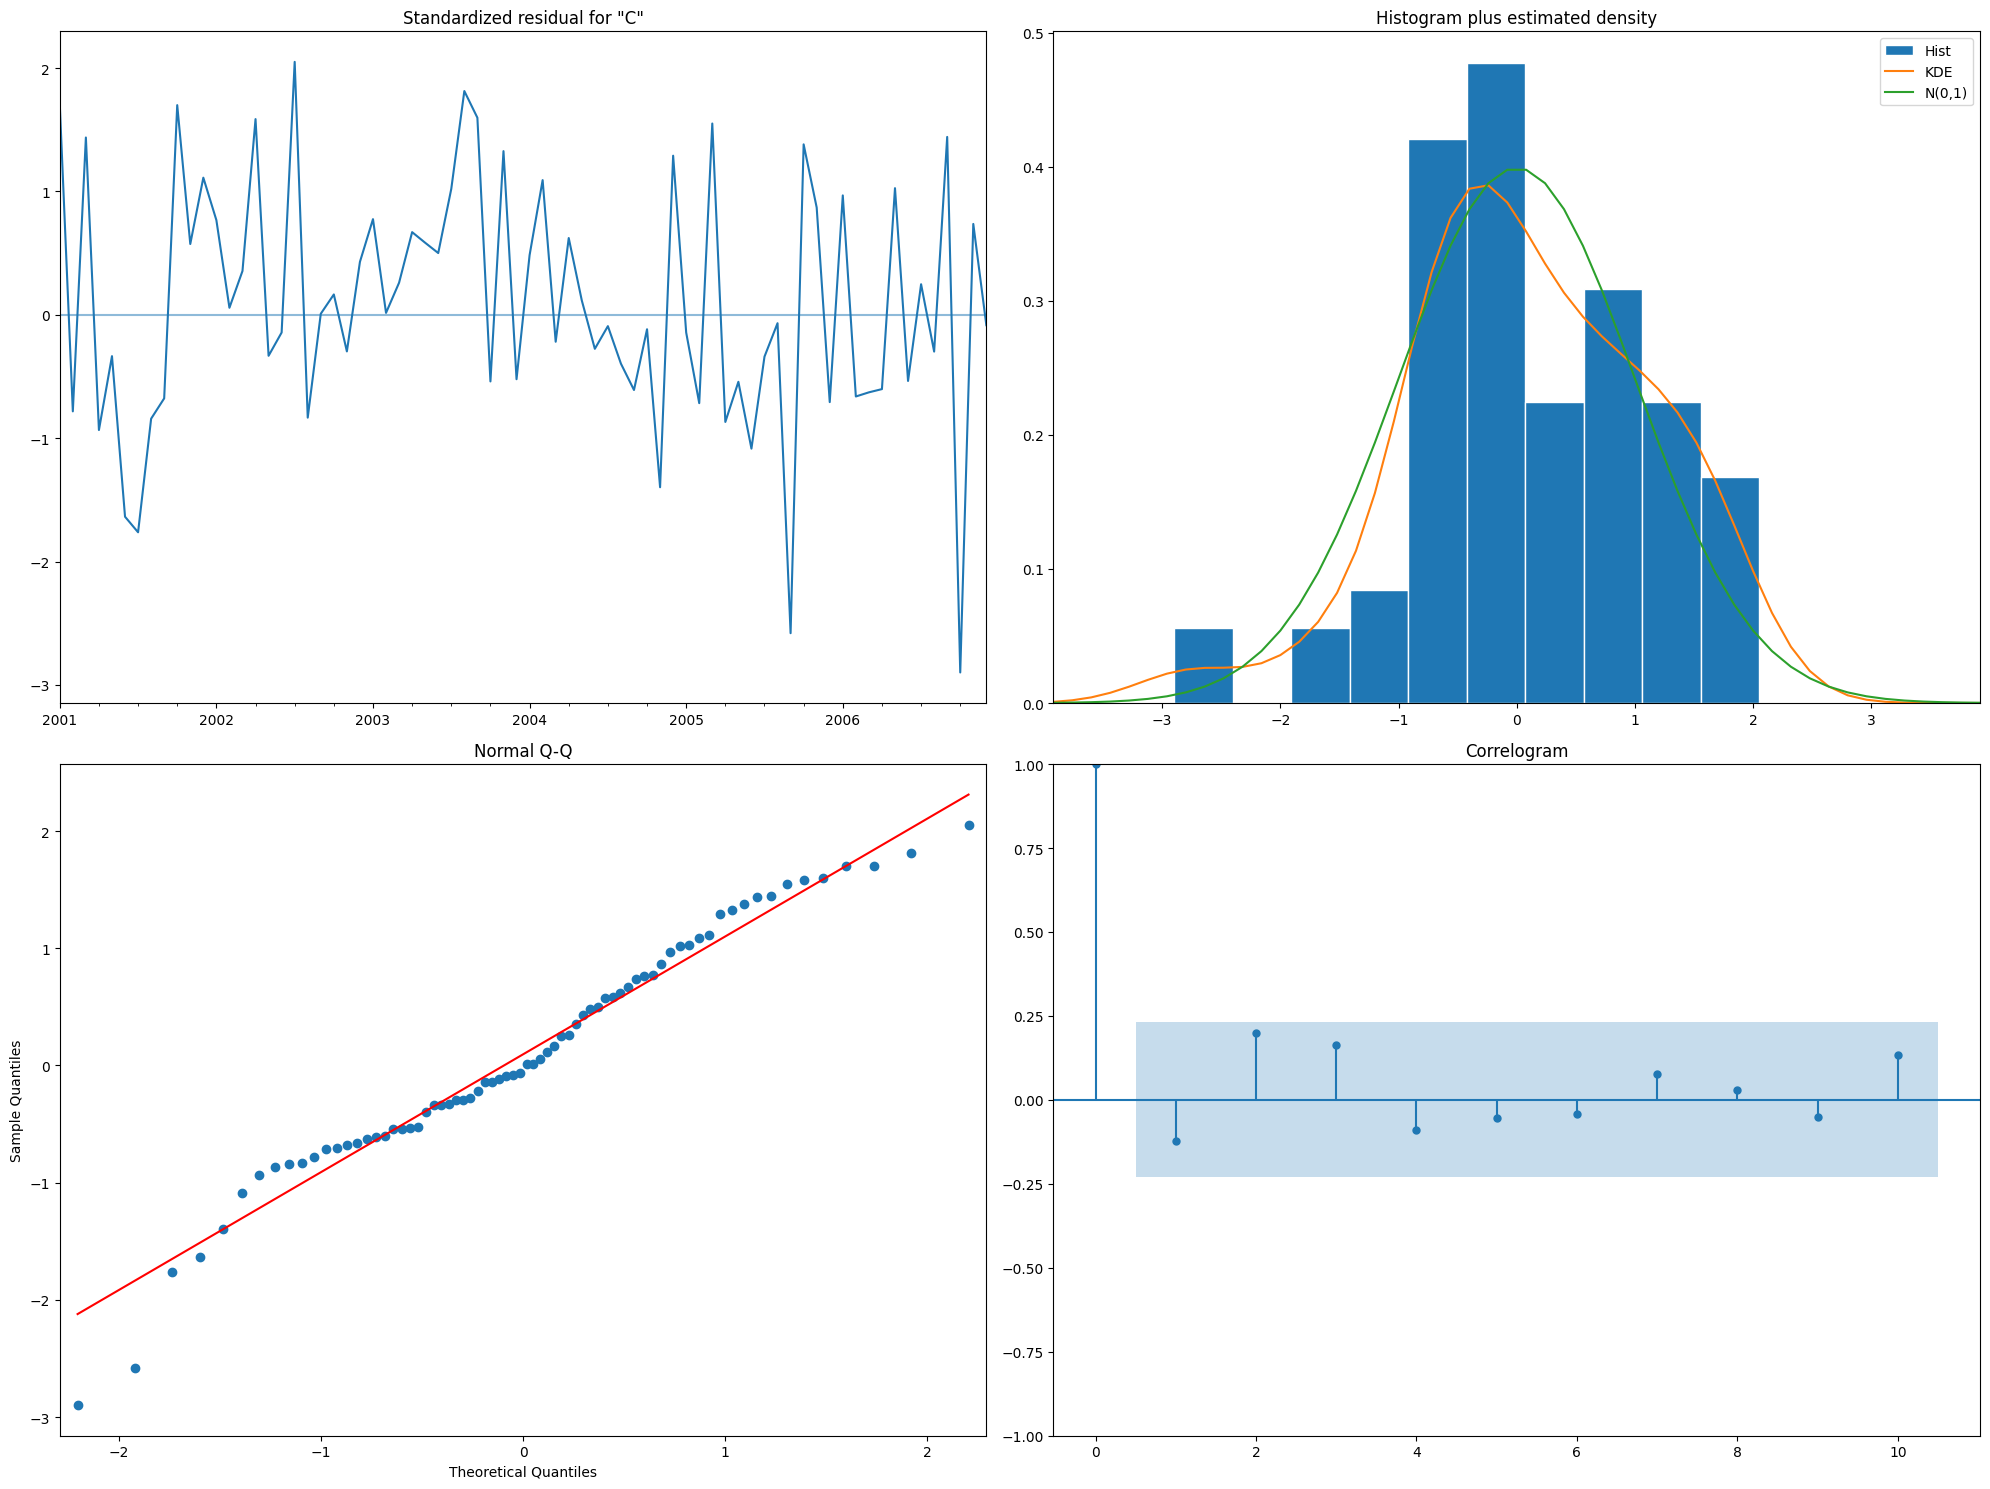

In [ ]:
results.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

Попробуем подобрать модель AR(1) с дамми на сезонность

In [ ]:
mod_d = sm.tsa.statespace.SARIMAX(data['COAL'], trend='t', order=(2,0,0), exog = dum)
results_d = mod_d.fit(disp = False)
print(results_d.summary())

                               SARIMAX Results                                
Dep. Variable:                   COAL   No. Observations:                   72
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -89.790
Date:                Wed, 05 Apr 2023   AIC                            211.580
Time:                        12:05:25   BIC                            248.007
Sample:                    01-01-2001   HQIC                           226.082
                         - 12-01-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0039      0.006      0.662      0.508      -0.008       0.015
1             57.7967      2.130     27.135      0.000      53.622      61.971
2             52.3611      2.217     23.614      0.0

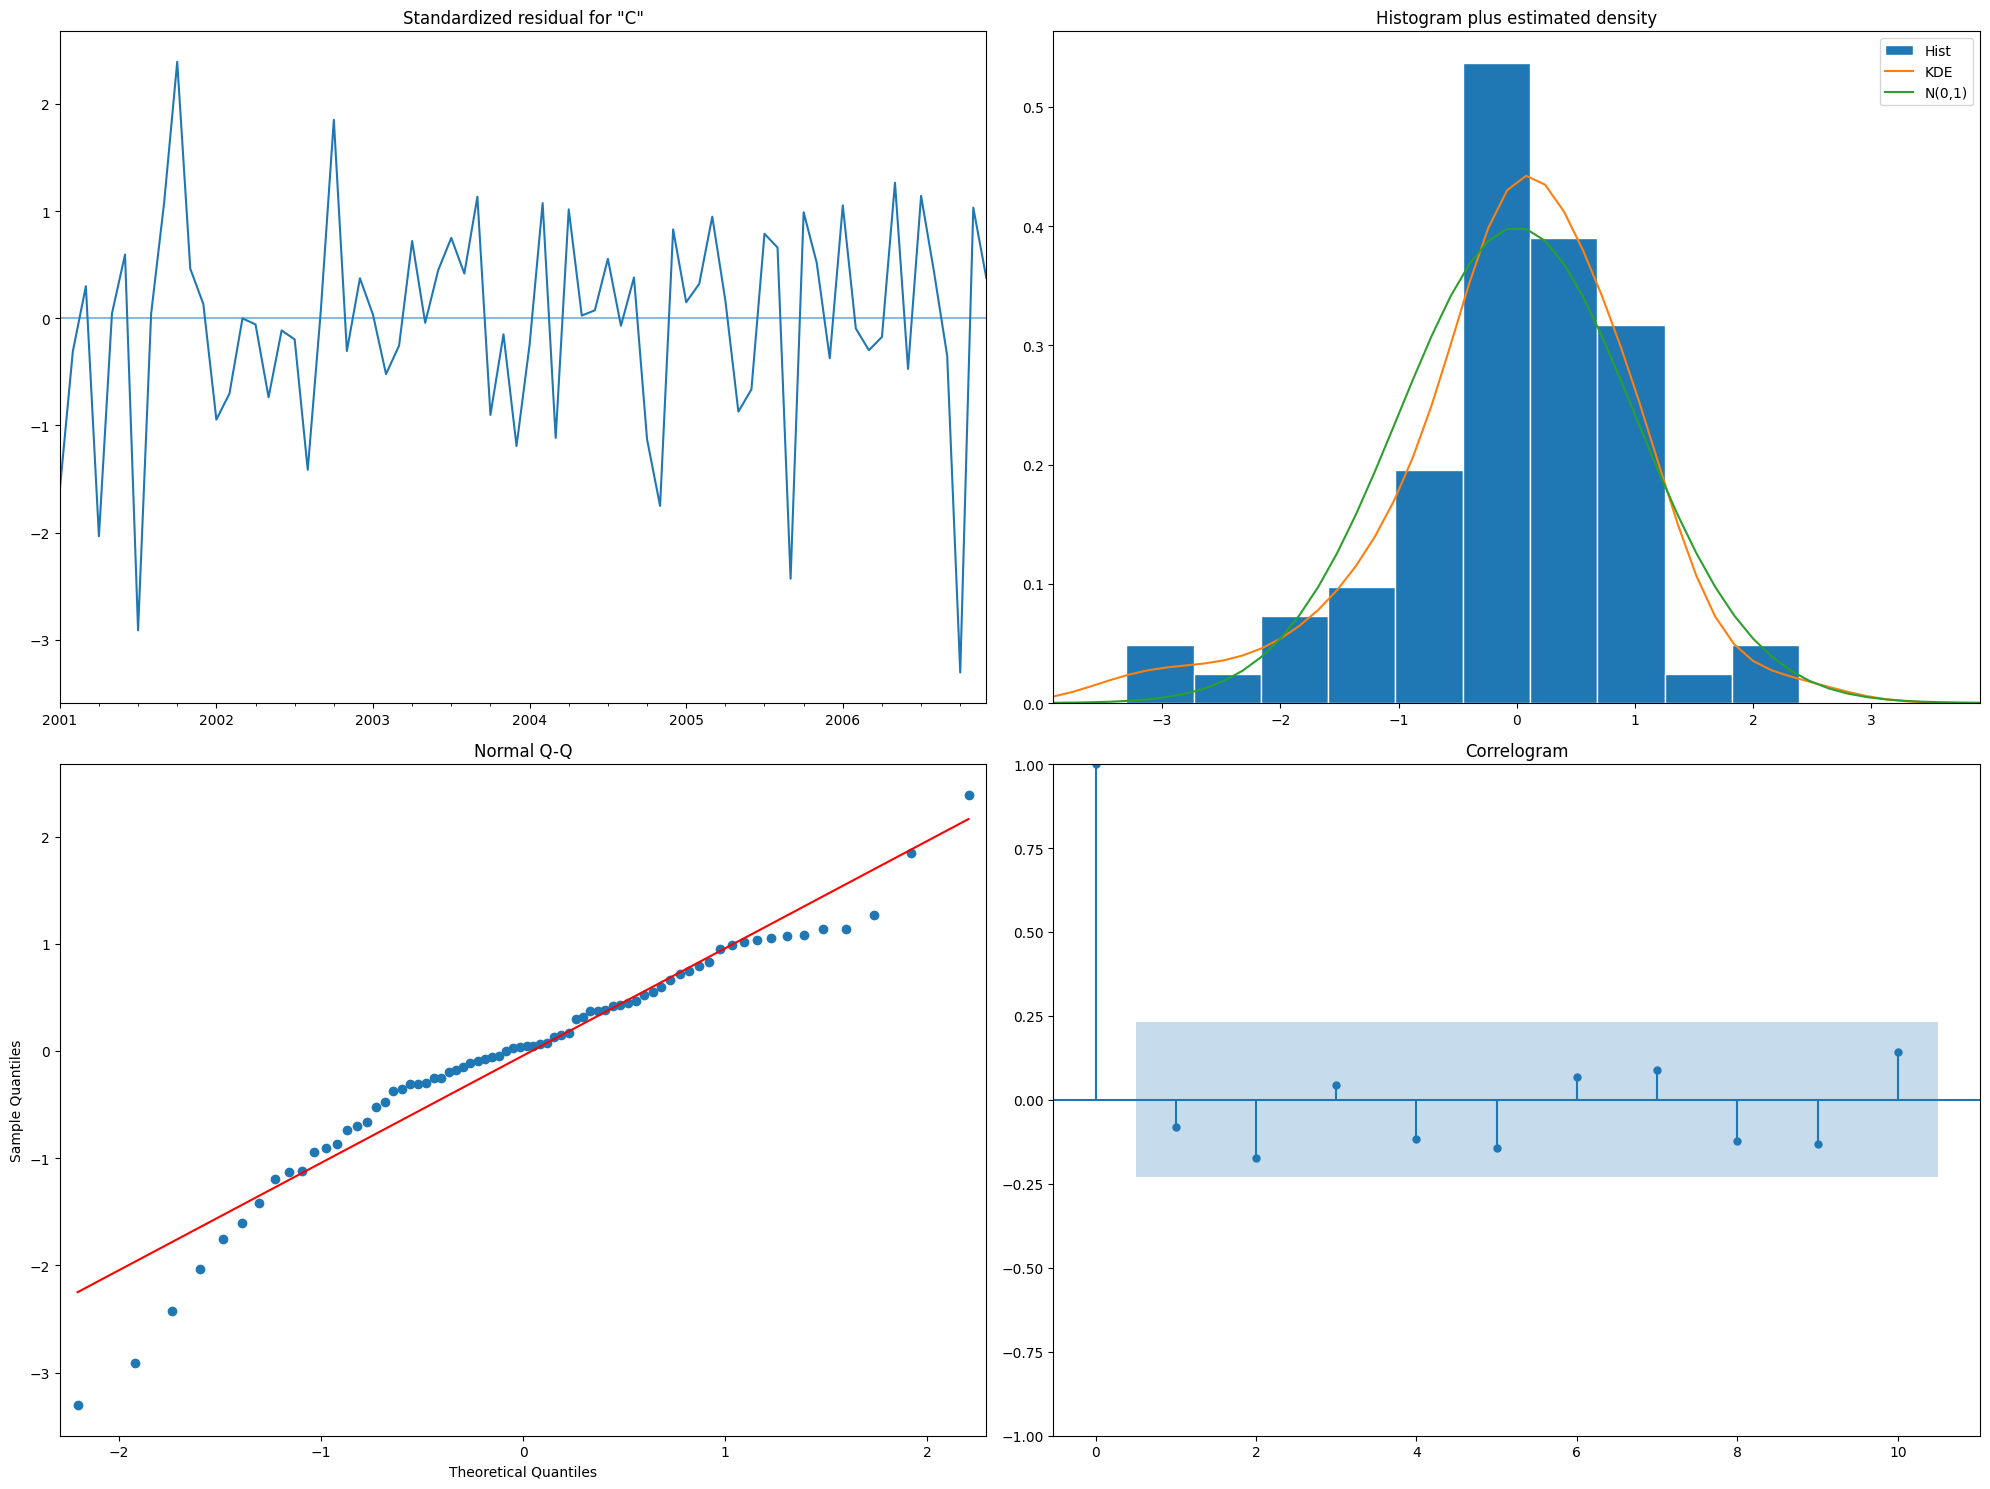

In [ ]:
results_d.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

### Задача 24*

Файл zadacha24.xlsx содержит реализации 7 моделей TS и DS рядов. Примените к этим рядам расширенный критерий Dickey – Fuller (ADF), выбирая тот или иной вариант критерия, исходя из поведения конкретной реализации. На основании результатов проведения таких тестов подберите модели, которые могли лежать в основе получения этих реализаций.

In [ ]:
data = pd.read_excel('zadacha24.xlsx')
data.head()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='Ряд z')
ax.plot(data['z'],'b-')

plt.show()

In [ ]:
adf_test(data['z'], 'c').summary()

На прошлом семинаре мы не обсуждали, что можно пользоваться функцией автоподбора!

Очень много различных настроек, которые повлияют на результат https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [ ]:
mod_auto_aic = pm.auto_arima(data['z'], start_p=0, start_q=0, max_p=4, max_q=0, max_d = 1,
                      suppress_warnings=True,  information_criterion='aic',
                      trace = False, return_valid_fits = True)
for mod in mod_auto_aic:
    print(mod.summary())

In [ ]:
mod_auto_bic = pm.auto_arima(data['z'], start_p=0, start_q=0, max_p=4, max_q=0, max_d = 1,
                      suppress_warnings=True,  information_criterion='bic',
                      trace = False, return_valid_fits = True)
for mod in mod_auto_bic:
    print(mod.summary())

Обе модели предлагают AR(2), проверим:

In [ ]:
mod_z = sm.tsa.statespace.SARIMAX(data['z'], trend='n', order=(1,0,0))
res_z = mod_z.fit(disp = False)
print(res_z.summary())

In [ ]:
res_z.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()